<a href="https://colab.research.google.com/github/jithesh9539/Connected_Deep_Networks/blob/main/a)Three_Layer_Deep_Networks_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.manifold import TSNE

**Three Dimensional Input**

In [2]:
bias_true = np.array([1,-1])
x = np.random.uniform(-1, 1, (100, 3))
weights_1 = np.array([[1, 1,0],[1,0,1]]).T
weights_2 = np.array([[0,0,1],[0,1,0]]).T

y_true = (x ** 2) @ weights_1 +  x @ weights_2 + bias_true

# dy/dx = 2*x*weights_true + weights_true
# dy/dw = x2 + x
# dy/db = 1
print(y_true.shape)
print((np.square(x).shape))
print(x)

(100, 2)
(100, 3)
[[ 0.82114929  0.98686457 -0.84257197]
 [-0.68239677  0.20567589  0.02908787]
 [ 0.14569359 -0.39854919  0.52487686]
 [-0.43291628 -0.93767747 -0.68106089]
 [ 0.92023416 -0.37981822 -0.27212061]
 [-0.12678511  0.91249178  0.22388486]
 [-0.34414657 -0.42705956  0.4174765 ]
 [ 0.68936599 -0.92531102 -0.44115502]
 [ 0.07729973  0.29176447 -0.28237735]
 [ 0.42445875  0.00628778  0.10802304]
 [-0.54778856 -0.23776065  0.40399103]
 [-0.37690408  0.39644992  0.11091671]
 [ 0.12898857  0.30950329  0.4310195 ]
 [-0.7477187   0.76965985  0.0398544 ]
 [ 0.60204981  0.01831238  0.57191257]
 [-0.45519168  0.6084559   0.21363402]
 [ 0.54919888 -0.96131448  0.34746437]
 [-0.8372172   0.80766514 -0.33800898]
 [ 0.76699234 -0.50926461 -0.97688745]
 [ 0.11249464 -0.39778665 -0.03737053]
 [ 0.38517494 -0.92454639 -0.89020091]
 [ 0.79001108 -0.00688872  0.37048299]
 [-0.11774608  0.91762576  0.98768637]
 [-0.27895364  0.84218242  0.130807  ]
 [-0.59037717  0.94877773  0.13639877]
 [ 0.49

**Function to Plot**

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(100, 2)
(100, 2)


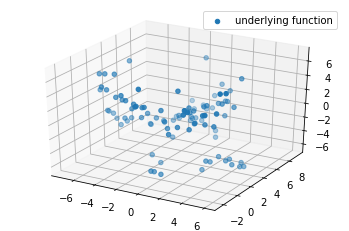

In [3]:
def plot_3d(x, y, y_pred=None):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], y, label='underlying function')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label='our function')
  plt.legend()

X_embedded = TSNE(n_components=2).fit_transform(x)
y_embedded = TSNE(n_components=1).fit_transform(y_true)

print(X_embedded.shape)
print(y_true.shape)

plot_3d(X_embedded, y_embedded)

**Loss Function and Linear Layer**

In [4]:
class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_pred - y_true) ** 2).mean()

  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = 2. * (self.y_pred - self.y_true) / n
    # print('MSE backward', self.y_pred.shape, self.y_true.shape, self.gradient.shape)
    #print('gradient shape',self.gradient.shape)
    return self.gradient


class Linear:
  def __init__(self, input_dim: int, num_hidden: int = 1):
    self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(num_hidden)
  
  def __call__(self, x):
    self.x = x
   # output = x @ self.weights + self.bias
    output = (x**2) @ self.weights + x @ self.weights + self.bias
    return output

  # x2 + x + 1
  # dy/dx = 2*x*weights_true + weights_true
  # dy/dw = x2 + x
  # dy/db = 1
  def backward(self, gradient):
    # self.weights_gradient = self.x.T @ gradient
    # self.bias_gradient = gradient.sum(axis=0)
    # self.x_gradient = gradient @ self.weights.T
    self.weights_gradient = (np.square(self.x) + self.x).T @ gradient
    self.bias_gradient = gradient.sum(axis=0)
    self.x_gradient = gradient @ self.weights.T
    return self.x_gradient

  def update(self, lr):
    self.weights = self.weights - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient

**RELU-Layer**

In [5]:
class Relu:
    def __call__(self, input_):
        self.input_ = input_
        self.output = np.clip(self.input_, 0, None)
        return self.output
    
    def backward(self, output_gradient):
      # import pdb; pdb.set_trace()  # By the way, this is how you can debug
      self.input_gradient = (self.input_ > 0) * output_gradient
      return self.input_gradient

**Model_Definition**

(100, 2)
91.97727472511917


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


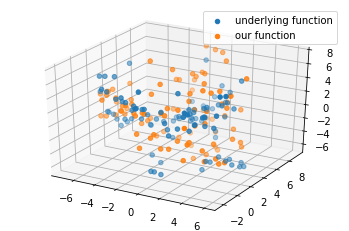

In [10]:
class Model:
  def __init__(self, input_dim, num_hidden):
    self.linear1 = Linear(input_dim, 6)
    self.relu = Relu()
    self.linear2 = Linear(6, 4)
    self.relu2 = Relu()
    self.linear3 = Linear(4, 2)

  
  def __call__(self, x):
    l1 = self.linear1(x)
    r = self.relu(l1)
    l2 = self.linear2(r)
    r2 = self.relu2(l2)
    l3 = self.linear3(r2)
    return l3
  
  def backward(self, output_gradient):

    linear3_gradient = self.linear3.backward(output_gradient)
    relu_gradient = self.relu2.backward(linear3_gradient)

    linear2_gradient = self.linear2.backward(relu_gradient)
    relu2_gradient = self.relu.backward(linear2_gradient)

    linear1_gradient = self.linear1.backward(relu2_gradient)
    #print('Model backward', linear2_gradient.shape, relu_gradient.shape, linear1_gradient.shape)
    return linear3_gradient

  def update(self, lr):
    self.linear3.update(lr)
    self.linear2.update(lr)
    self.linear1.update(lr)

loss = MSE()
model = Model(3, 1)
y_pred = model(x)
print(y_pred.shape)
loss_value = loss(y_pred, y_true)
loss_gradient = loss.backward()
print(loss_value)
model.backward(loss_gradient)
y_pred_embedded = TSNE(n_components=1).fit_transform(y_pred)

plot_3d(X_embedded, y_embedded,y_pred_embedded)
    


Function_Train

In [11]:
from typing import Callable

def fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)

Epoch 0, loss 91.97727472511917
Epoch 1, loss 66201.86879456867
Epoch 2, loss 1662592013.8444302
Epoch 3, loss 2.0182738378391218e+31
Epoch 4, loss 4.4171579101968577e+27
Epoch 5, loss 4.070852730037424e+27
Epoch 6, loss 3.7516978760024895e+27
Epoch 7, loss 3.457564762523894e+27
Epoch 8, loss 3.186491685142021e+27
Epoch 9, loss 2.936670737026887e+27
Epoch 10, loss 2.706435751243979e+27
Epoch 11, loss 2.49425118834645e+27
Epoch 12, loss 2.2987018951800882e+27
Epoch 13, loss 2.1184836665979694e+27
Epoch 14, loss 1.9523945471366885e+27
Epoch 15, loss 1.7993268146411727e+27
Epoch 16, loss 1.6582595923733046e+27
Epoch 17, loss 1.5282520403312376e+27
Epoch 18, loss 1.4084370803692686e+27
Epoch 19, loss 1.2980156132683178e+27
Epoch 20, loss 1.1962511891880817e+27
Epoch 21, loss 1.1024650959557359e+27
Epoch 22, loss 1.0160318324328063e+27
Epoch 23, loss 9.36374936770074e+26
Epoch 24, loss 8.629631417273002e+26
Epoch 25, loss 7.9530683141588e+26
Epoch 26, loss 7.329547758328747e+26
Epoch 27, lo

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


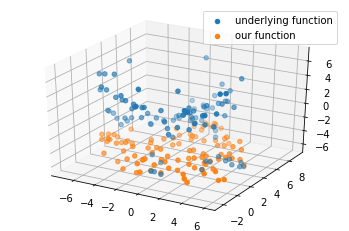

In [12]:
fit(x, y_true, model=model, loss=loss, lr=0.02, num_epochs=70)
y_pred= model(x)
y_pred_embedded = TSNE(n_components=1).fit_transform(y_pred)
plot_3d(X_embedded, y_embedded,y_pred_embedded)